In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [77]:
df = pd.read_csv("../docs/error_voltage_all.csv")
df

,0.5v,3v,6v,9v,12v,15v,18v,21v,24.5v
0,2.0,12.000000,0.333333,0.444444,0.083333,0.266667,0.388889,0.571429,0.163265
1,8.0,0.666667,0.333333,0.666667,1.333333,0.266667,0.222222,0.571429,0.326531
2,2.0,3.333333,0.333333,0.222222,0.333333,0.066667,0.111111,0.428571,0.530612
3,8.0,1.666667,0.166667,0.888889,0.083333,0.066667,1.055556,1.047619,1.224490
4,12.0,1.666667,0.500000,1.444444,0.083333,1.066667,0.111111,0.809524,1.755102
...,...,...,...,...,...,...,...,...,...
995,12.0,2.666667,1.166667,0.444444,0.083333,0.066667,0.222222,0.571429,1.632653
996,32.0,2.333333,0.833333,0.444444,0.083333,0.066667,1.055556,0.428571,0.448980
997,8.0,1.666667,1.666667,0.444444,0.333333,0.066667,0.388889,0.190476,0.530612
998,26.0,0.000000,1.166667,0.444444,0.083333,0.066667,0.111111,0.428571,1.428571


In [78]:
list_voltage = []
for i in df.columns:
    list_voltage.append(str(i))

df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=list_voltage)
# replace column names
df_melt.columns = ['index', 'voltage', 'value']
df_melt

,index,voltage,value
0,0,0.5v,2.000000
1,1,0.5v,8.000000
2,2,0.5v,2.000000
3,3,0.5v,8.000000
4,4,0.5v,12.000000
...,...,...,...
8995,995,24.5v,1.632653
8996,996,24.5v,0.448980
8997,997,24.5v,0.530612
8998,998,24.5v,1.428571


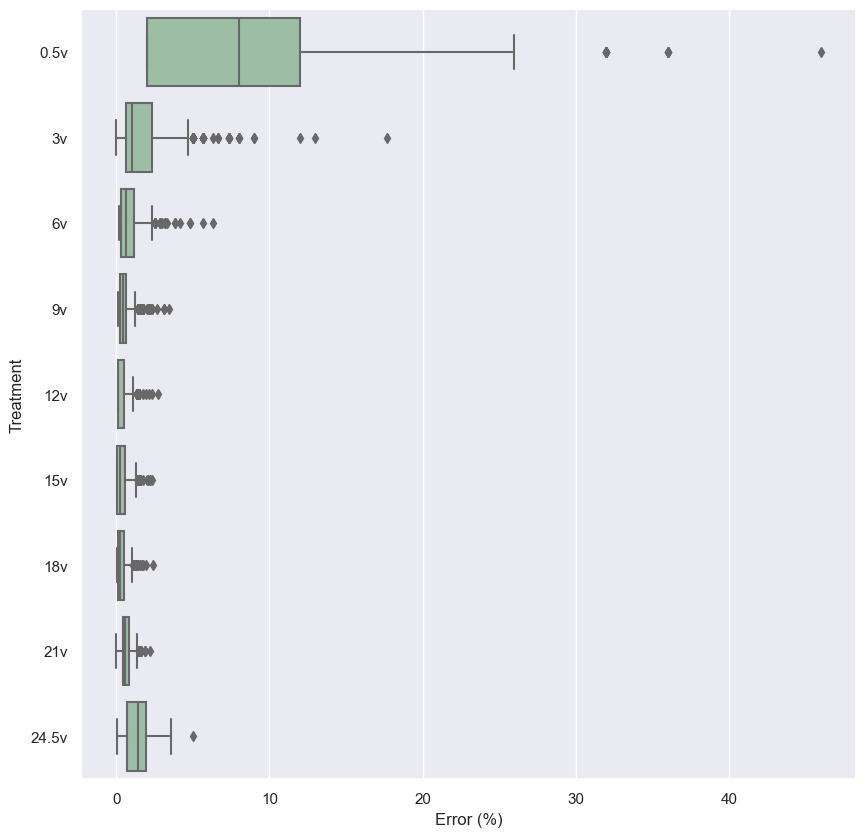

In [132]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('darkgrid')
ax = sns.boxplot(x='value', y='voltage', data=df_melt, color='#99c2a2')
ax.set(xlabel='Error (%)', ylabel='Treatment')
plt.show()

In [79]:
new = ols('value ~ voltage', data = df_melt).fit()
an = sm.stats.anova_lm(new)
an

,df,sum_sq,mean_sq,F,PR(>F)
voltage,8.0,55711.196562,6963.899570,1268.461147,0.0
Residual,8991.0,49360.929328,5.490038,NaN,NaN


In [81]:
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='voltage', anova_model='value ~ C(voltage)')
df_tukey = res.tukey_summary
df_tukey

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,0.5v,3v,6.923667,6.598569,7.248764,93.443369,0.001000
1,0.5v,6v,7.725167,7.400069,8.050264,104.260594,0.001000
2,0.5v,9v,8.031778,7.706680,8.356876,108.398686,0.001000
3,0.5v,12v,8.201917,7.876819,8.527014,110.694919,0.001000
4,0.5v,15v,8.164467,7.839369,8.489564,110.189486,0.001000
5,0.5v,18v,8.189611,7.864513,8.514709,110.528841,0.001000
6,0.5v,21v,7.938905,7.613807,8.264003,107.145251,0.001000
7,0.5v,24.5v,7.236694,6.911596,7.561792,97.668054,0.001000
8,3v,6v,0.801500,0.476402,1.126598,10.817225,0.001000
9,3v,9v,1.108111,0.783013,1.433209,14.955318,0.001000


In [59]:
print(res.anova_std_residuals)

0      -2.794609
1      -0.233880
2      -2.794609
3      -0.233880
4       1.473273
          ...   
8995    0.137147
8996   -0.368031
8997   -0.333191
8998    0.050047
8999    0.276506
Length: 9000, dtype: float64


In [82]:
count = 0
index_outlier = []

for i in res.anova_std_residuals:
    if (i > res.anova_std_residuals.mean() + 2.575 * res.anova_std_residuals.std()) or (i < res.anova_std_residuals.mean() - 2.575 * res.anova_std_residuals.std()):
        index_outlier.append(count)
        print(i)
        count = count +  1
    else:
        count = count +  1

print(f"Removing by 99% :  {res.anova_std_residuals.mean() + 2.575 * res.anova_std_residuals.std()} or {res.anova_std_residuals.mean() - 2.575 * res.anova_std_residuals.std()}")
print(f" 0.5v outlier data : {len([i for i in index_outlier if i < 1000])}")
print(f" 3v outlier data : {len([i for i in index_outlier if (i >= 1000)])}")
print(len(index_outlier))
print(count)   

-2.794608693612182
-2.794608693612182
-2.794608693612182
5.741153962502979
-2.794608693612182
-2.794608693612182
3.1804251656684324
-2.794608693612182
-2.794608693612182
-2.794608693612182
-2.794608693612182
-2.794608693612182
3.1804251656684324
-2.794608693612182
5.741153962502979
3.1804251656684324
-2.794608693612182
-2.794608693612182
-2.794608693612182
-2.794608693612182
-2.794608693612182
-2.794608693612182
3.1804251656684324
-2.794608693612182
5.741153962502979
3.1804251656684324
-2.794608693612182
-2.794608693612182
-2.794608693612182
3.1804251656684324
-2.794608693612182
-2.794608693612182
-2.794608693612182
5.741153962502979
-2.794608693612182
-2.794608693612182
-2.794608693612182
-2.794608693612182
-2.794608693612182
-2.794608693612182
3.1804251656684324
-2.794608693612182
3.1804251656684324
7.448306493726011
3.1804251656684324
5.741153962502979
-2.794608693612182
-2.794608693612182
-2.794608693612182
-2.794608693612182
-2.794608693612182
-2.794608693612182
-2.794608693612182

In [93]:
print(index_outlier)

[0, 2, 6, 11, 13, 16, 17, 19, 24, 25, 26, 28, 30, 32, 34, 37, 39, 40, 41, 42, 45, 49, 51, 52, 53, 54, 55, 56, 59, 63, 64, 66, 68, 71, 72, 75, 76, 77, 79, 80, 83, 84, 85, 87, 91, 92, 94, 95, 101, 102, 103, 105, 109, 111, 118, 120, 122, 132, 133, 134, 136, 137, 138, 140, 142, 144, 146, 148, 154, 155, 157, 158, 159, 160, 162, 164, 165, 169, 171, 172, 173, 176, 178, 179, 181, 182, 183, 186, 187, 188, 192, 195, 196, 198, 199, 200, 201, 202, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 217, 219, 220, 222, 223, 225, 226, 229, 230, 231, 232, 234, 235, 236, 238, 239, 240, 241, 246, 248, 250, 251, 252, 254, 256, 257, 258, 259, 261, 263, 266, 267, 269, 270, 271, 273, 276, 278, 281, 282, 284, 285, 286, 294, 298, 301, 305, 306, 310, 312, 316, 320, 321, 325, 326, 327, 328, 331, 335, 336, 337, 338, 339, 348, 352, 354, 355, 357, 358, 362, 364, 367, 368, 369, 370, 371, 372, 374, 378, 379, 380, 382, 383, 385, 390, 391, 393, 395, 397, 398, 399, 400, 401, 404, 407, 409, 410, 411, 412, 413, 414, 417, 

In [94]:
df_drop_outlier = df_melt.drop(labels=index_outlier)


In [95]:
df_melt

,index,voltage,value
0,0,0.5v,2.000000
1,1,0.5v,8.000000
2,2,0.5v,2.000000
3,3,0.5v,8.000000
4,4,0.5v,12.000000
...,...,...,...
8995,995,24.5v,1.632653
8996,996,24.5v,0.448980
8997,997,24.5v,0.530612
8998,998,24.5v,1.428571


In [96]:
df_drop_outlier

,index,voltage,value
1,1,0.5v,8.000000
3,3,0.5v,8.000000
4,4,0.5v,12.000000
5,5,0.5v,8.000000
7,7,0.5v,8.000000
...,...,...,...
8995,995,24.5v,1.632653
8996,996,24.5v,0.448980
8997,997,24.5v,0.530612
8998,998,24.5v,1.428571


In [97]:
rem_outlier = ols('value ~ voltage', data = df_drop_outlier).fit()
ANOVA_REMOVE = sm.stats.anova_lm(rem_outlier)
ANOVA_REMOVE

,df,sum_sq,mean_sq,F,PR(>F)
voltage,8.0,35537.481614,4442.185202,7229.619285,0.0
Residual,8472.0,5205.556689,0.614442,NaN,NaN


In [98]:
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=df_drop_outlier, res_var='value', xfac_var='voltage', anova_model='value ~ C(voltage)')
df_remove_tukey = res.tukey_summary
df_remove_tukey

g:\Program\Python\__env\Yolo2TFLite\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,0.5v,3v,7.781250,7.646873,7.915627,254.071813,0.001000
1,0.5v,6v,8.510500,8.376300,8.644700,278.250874,0.001000
2,0.5v,9v,8.817111,8.682911,8.951311,288.275528,0.001000
3,0.5v,12v,8.987250,8.853050,9.121450,293.838220,0.001000
4,0.5v,15v,8.949800,8.815600,9.084000,292.613792,0.001000
5,0.5v,18v,8.974944,8.840745,9.109144,293.435890,0.001000
6,0.5v,21v,8.724238,8.590038,8.858438,285.239043,0.001000
7,0.5v,24.5v,8.022027,7.887828,8.156227,262.280252,0.001000
8,3v,6v,0.729250,0.620270,0.838230,29.360401,0.001000
9,3v,9v,1.035861,0.926881,1.144841,41.704900,0.001000


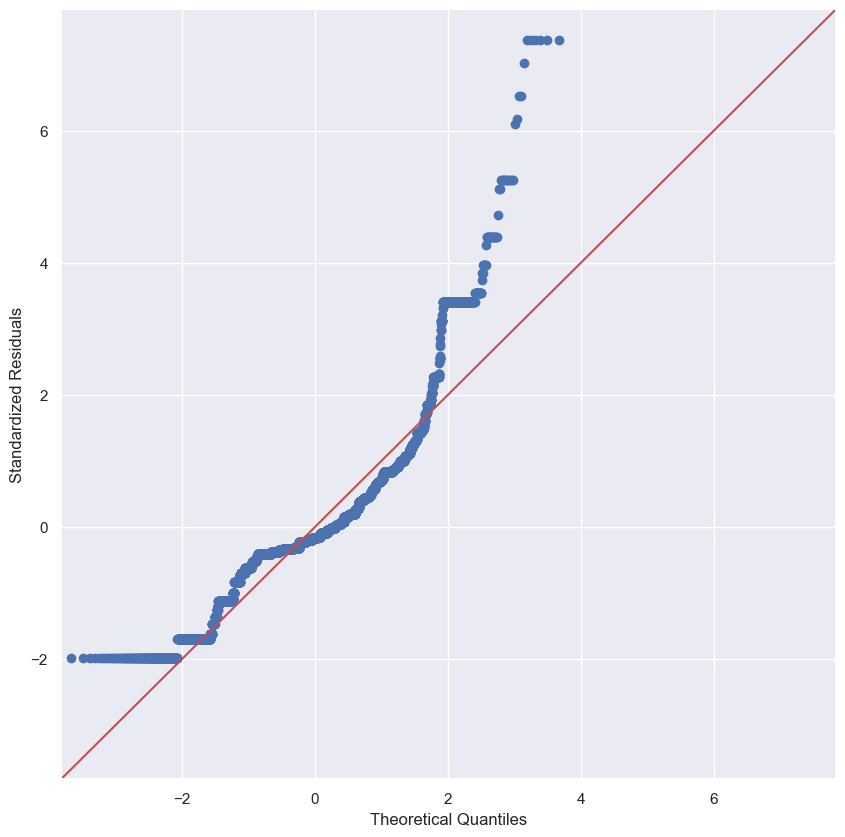

In [99]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

In [105]:
w, pvalue = stats.shapiro(rem_outlier.resid)
print(w, pvalue)

0.8594337701797485 0.0


g:\Program\Python\__env\Yolo2TFLite\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [112]:
list_voltage = []
for i in df.columns:
    list_voltage.append(str(i))

df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=list_voltage)
# replace column names
df_melt.columns = ['index', 'voltage', 'value']
df_melt

,index,voltage,value
0,0,0.5v,2.000000
1,1,0.5v,8.000000
2,2,0.5v,2.000000
3,3,0.5v,8.000000
4,4,0.5v,12.000000
...,...,...,...
8995,995,24.5v,1.632653
8996,996,24.5v,0.448980
8997,997,24.5v,0.530612
8998,998,24.5v,1.428571


g:\Program\Python\__env\Yolo2TFLite\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='value', ylabel='Density'>

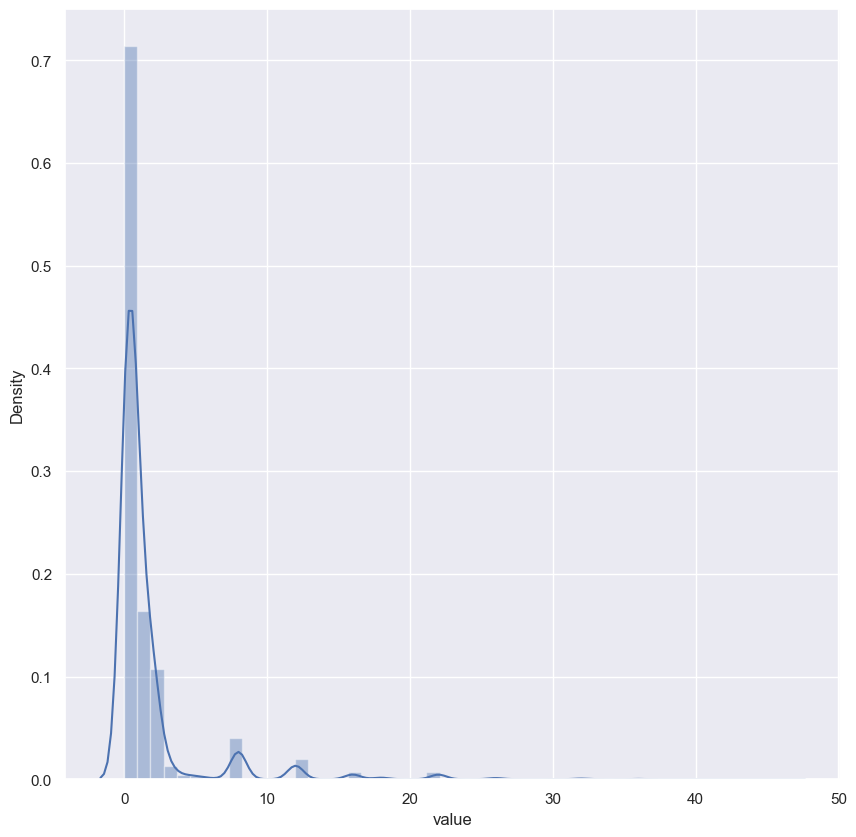

In [129]:
sns.distplot(df_melt['value'])

In [131]:
print("Highest allowed",df_melt['value'].mean() + 2.57*df_melt['value'].std())
print("Lowest allowed",df_melt['value'].mean() - 2.57*df_melt['value'].std())

percentile25 = df_melt['value'].quantile(0.25)
percentile75 = df_melt['value'].quantile(0.75)
IQR = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr




print(f"Q1 : {percentile25}, Q3: {percentile75}, IQR : {IQR}")

Highest allowed 10.395034108870034
Lowest allowed -7.1684128188725555
Q1 : 0.2222222222222175, Q3: 1.3809523809523767, IQR : 1.1587301587301593
